# MOBILITY CHARACTERISATION

    1. We study the probability density function of all instantaneous velocities and fit it with a Log-normal distribution
    
    2. Then we work with the logarithm of the velocity (adding a scaling factor for units):  u=ln(v/<v>).  Then the pdf can be fitted with a Normal distribution.
    
    3. We study the mean square displacement which shows an almost ballistic behaviour (gamma~2) for N<20 (which corresponds up to a time of 300s on average).
    
    4. Then we study the auto-correlation of the velocities (u) which shows an exponential decay with a characteristic decaying time (for N<12, corresponding to a time of t<90s on average).
    
    5. We also obtain the plots for the temporal series of the instantaneous velocity, which shows a random path with reversing fluctuations towards a certain normal velocity level.
    
    6. Finally, we obtain the probability density function of the Stops duration, which also shows an exponential decay.
    
    7. At the end, we make nicer plots for publication purposes.
    
    
    

In [1]:
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import glob
import os
from math import sin, cos, sqrt, atan2, radians
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.optimize import curve_fit

#%matplotlib inline
ox.config(log_console=True)
ox.__version__



'1.0.1'

# 1. Instantaneous velocity

## 1.1 - Probability density function. Log-Normal distribution

We fit the pdf of instantaneous velocities with a Log-Normal distribution of the form:

\begin{align}
p(v)=\frac{1}{v\sqrt{2\pi \sigma^{2}}} e^{-\frac{\left( log(v)-\mu \right)^{2}}{2\sigma^{2}}}
\end{align}

<v>= 1.2763481603502125  std= 0.6700568784988934  e= 0.014471024516969994
min v= 0.5559746332236926  max v= 7.54464212041001
q1 (25%): 0.8935114074421747
q2 (50%): 1.139584036468713
q3 (75%): 1.4055990534820073

----------------------------------------------------------------------

FIT PARAMETERS
mu= 0.11242031746592242 +- 0.009753198568957391
sigma= 0.34617975736704465 +- 0.008294448625050185


<ipython-input-4-1ea049489603>:50: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-4-1ea049489603>:51: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


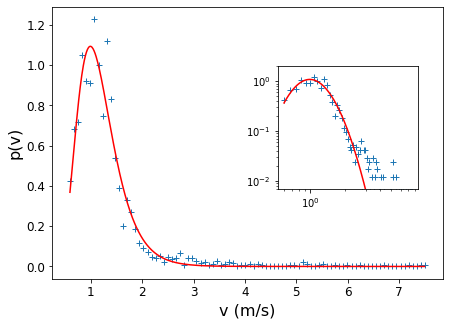

In [4]:
all_files = glob.glob(os.path.join("*.csv")) # Make list of paths (csv files for all individuals)

velocities=[] 
for file in all_files:   # Loop over all csv files in the folder/directory   
    df = pd.read_csv(file)  # Read the csv file of each user
    df2=df.copy() 
    
    v3=df2.loc[df2['stops'] == 'flight', 'v'].tolist()    # Take only the data-set points labelled as flight
    v2=v3[:-1]
    
    v=[]
    for i in range(len(v2)):    # We disregard velocities greater than 8m/s (outliers)
        if v2[i]<8.0:
            v.append(v2[i])
    
    velocities.extend(v)
    

    
mean = sum(velocities) / len(velocities)
variance = sum([((x - mean) ** 2) for x in velocities]) / len(velocities)
res = variance ** 0.5
error=res/(len(velocities)**0.5)
q1=np.quantile(velocities, 0.25)
q2=np.quantile(velocities, 0.50)
q3=np.quantile(velocities, 0.75)
print('<v>=',mean, '', 'std=',res, '', 'e=',error)
print('min v=',min(velocities),'', 'max v=',max(velocities))
print('q1 (25%):',q1)
print('q2 (50%):',q2)
print('q3 (75%):',q3)

print('')
print('----------------------------------------------------------------------')
print('')


#HISTOGRAM (PDF)
fig, ax = plt.subplots(figsize=(7,5)) 
axins2 = inset_axes(ax, width="80%", height="100%", loc=1,bbox_to_anchor=(0.50,1-0.65,.45,.45), bbox_transform=ax.transAxes)

numpy_matrix = np.array(velocities)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,bins='auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '+', label='data')    #plot pdf
axins2.plot(bin_centres, counts, '+', label='data')    #plot pdf
ax.set_xlabel('v (m/s)',fontsize=16)
ax.set_ylabel('p(v)',fontsize=16)

axins2.set_yscale('log',basey=10)
axins2.set_xscale('log',basex=10)
axins2.set_ylim(0.007,2)
ax.tick_params(labelsize=12)



#LOG-NORMAl DISTRIBUTION FIT
def lognormal(x,sigmag,mu):
    return (1./(sigmag*np.sqrt(2*math.pi)*x))*np.exp(-(np.power((np.log(x)-mu),2)/(2*np.power(sigmag,2))))

#LOG-NORMAL FIT. 
popt_pdf, pcov_pdf = curve_fit(lognormal, bin_centres[:], counts[:], p0=(1,1))
times_pdf = np.arange(bin_centres[0], bin_centres[-1], 0.01)
model_pdf = lognormal(times_pdf, *popt_pdf)
perr_pdf = np.sqrt(np.diag(pcov_pdf))  #calcul error del parametre
ax.plot(times_pdf, model_pdf, '-r',label='fit')
axins2.plot(times_pdf, model_pdf, '-r', label='fit')

print('FIT PARAMETERS')
print('mu=', popt_pdf[1], '+-', perr_pdf[1])
print('sigma=', popt_pdf[0], '+-', perr_pdf[0])
#plt.savefig('pdf.png',dpi=250)
plt.show()   





## 1.2 - Probability density function. Normal distribution

We fit the pdf of the logarithm of all instantaneous velocities with a Gaussian distribution of the form:

\begin{align}
p(u)=\frac{1}{\sqrt{2\pi \sigma^{2}}} e^{-\frac{\left( u-\mu \right)^{2}}{2\sigma^{2}}}
\end{align}


with $u=\ln{\left(\frac{u}{\langle v \rangle}\right)}$.  The sacaling factor $\langle v \rangle$ is the mean instantaneous velocity for each group and is used for units (then u is adimensional). 

<ipython-input-5-f29f96a47647>:38: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-5-f29f96a47647>:39: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


FIT PARAMETERS
mu= -0.10737412354364287 +- 0.009093050419224936
sigma= 0.3142012566369769 +- 0.007439611493445351


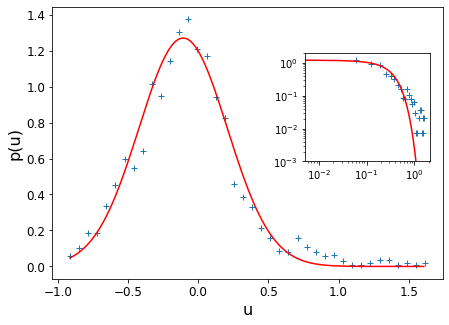

In [5]:
all_files = glob.glob(os.path.join("*.csv")) # Make list of paths (csv files for all individuals)

velocities=[] 
u=[]
for file in all_files:   # Loop over all csv files in the folder/directory   
    df = pd.read_csv(file)  # Read the csv file of each user
    df2=df.copy() 
    
    v3=df2.loc[df2['stops'] == 'flight', 'v'].tolist()
    v2=v3[:-1]
    
    v=[]
    for i in range(len(v2)):
        if v2[i]<8.0:
            v.append(v2[i])
    
    velocities.extend(v)
    
    v_log=[]
    mean_v=sum(v)/len(v)
    for i in range(len(v)):
        v_log.append(np.log(v[i]/mean_v))
        
    u.extend(v_log)
    
    
fig, ax = plt.subplots(figsize=(7,5)) 
axins2 = inset_axes(ax, width="80%", height="100%", loc=1,bbox_to_anchor=(0.58,1-0.55,.40,.40), bbox_transform=ax.transAxes)

numpy_matrix_log = np.array(u)  #list to array
counts_log,bin_edges_log = np.histogram(numpy_matrix_log,bins='auto',density=True)   #frequences and bins
bin_centres_log = (bin_edges_log[:-1] + bin_edges_log[1:])/2.   #bins center
ax.plot(bin_centres_log, counts_log, '+', label='data')    #plot pdf
axins2.plot(bin_centres_log, counts_log, '+', label='data')    #plot pdf
ax.set_xlabel('u',fontsize=16)
ax.set_ylabel('p(u)',fontsize=16)

axins2.set_yscale('log',basey=10)
axins2.set_xscale('log',basex=10)
axins2.set_ylim(0.001,2)
ax.tick_params(labelsize=12)


def normal(x,sigmag,mu):
    return (1./(sigmag*np.sqrt(2*math.pi)))*np.exp(-(np.power((x-mu),2)/(2*np.power(sigmag,2))))

#LOG-NORMAL FIT. 
popt_log, pcov_log = curve_fit(normal, bin_centres_log[:], counts_log[:], p0=(1,1))
times_log = np.arange(bin_centres_log[0], bin_centres_log[-1], 0.01)
model_log = normal(times_log, *popt_log)
perr_log = np.sqrt(np.diag(pcov_log))  #calcul error del parametre
ax.plot(times_log, model_log, '-r',label='fit')
axins2.plot(times_log, model_log, '-r', label='fit')

print('FIT PARAMETERS')
print('mu=', popt_log[1], '+-', perr_log[1])
print('sigma=', popt_log[0], '+-', perr_log[0])
#plt.savefig('pdf.png',dpi=250)
plt.show()   





## 1.3- Collapse individual pdfs

Rescaling all individual pdfs of u (for each group), they collapse into a single pdf with mean 0 and unit variance

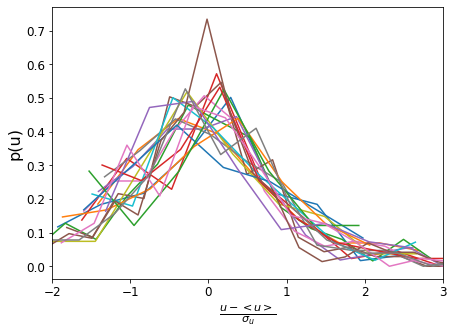

In [4]:
all_files = glob.glob(os.path.join("*.csv")) # Make list of paths (csv files for all individuals)

fig, ax = plt.subplots(figsize=(7,5)) 

for file in all_files:   # Loop over all csv files in the folder/directory   
    df = pd.read_csv(file)  # Read the csv file of each user
    df2=df.copy() 
    
    v3=df2.loc[df2['stops'] == 'flight', 'v'].tolist()
    v2=v3[:-1]
    
    v=[]
    for i in range(len(v2)):
        if v2[i]<8.0:
            v.append(v2[i])
            
    v_log=[]
    mean_v=sum(v)/len(v)
    for i in range(len(v)):
        v_log.append(np.log(v[i]/mean_v))
        
    u_rescaled=[]
    mean_u=sum(v_log)/len(v_log)
    variance_u = sum([((x_u- mean_u) ** 2) for x_u in v_log]) / len(v_log)
    res_u = variance_u ** 0.5
    for i in range(len(v_log)):
        u_rescaled.append((v_log[i]-mean_u)/res_u)
        
    
    numpy_matrix = np.array(u_rescaled)  #list to array
    counts,bin_edges = np.histogram(numpy_matrix,bins='auto',density=True)   #frequences and bins
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
    ax.plot(bin_centres, counts, '-', label='data')    #plot pdf
    ax.set_xlabel(r'$\frac{u-<u>}{\sigma_u}$',fontsize=16)
    ax.set_ylabel('p(u)',fontsize=16)
    ax.tick_params(labelsize=12)
    ax.set_xlim(-2,3)


plt.show()




# 2. Mean Squared Displacement

We obtain the mean squared displacement which gives a measure of the type of difussion, using the cartesian distance of each location respect to the origin point.

\begin{align}
MSD(T)=\langle \vert \vec{r}(t+T)-\vec{r}(t) \vert^{2} \rangle
\end{align}

We fit the data with $MSD(T)\sim T^{\gamma}$ and we can distinct four cases:

$\gamma < 1$: subdiffusive regime

$\gamma =1$: brownian motion

$\gamma>1$: superdiffusive regime

$\gamma =2$: ballistic movement (constant velocity, no dispersion, fully oriented)


In our case we obtain MSD(N), using N rather than T since we are using consecutive points that are not uniformly separated in time

<ipython-input-7-518be5b31913>:75: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_yscale('log',basey=10)
<ipython-input-7-518be5b31913>:76: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_xscale('log',basex=10)


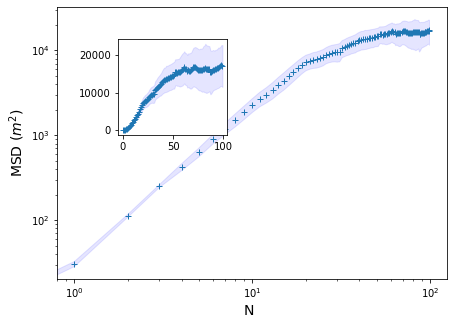

In [7]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import math
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from numpy.random import shuffle
from math import sin, cos, sqrt, atan2, radians


def potencia(x,a,alpha):  #f(x)=a·x^alpha to fit MSD.
    return a*x**alpha

def getDistanceFromLatLonInM(lat1,lon1,lat2,lon2):   #Function that returns the cartesian distance between two GPS locations
    R = 6371 # Radius of the earth in km
    dLat = radians(lat2-lat1)
    dLon = radians(lon2-lon1)
    rLat1 = radians(lat1)
    rLat2 = radians(lat2)
    a = sin(dLat/2) * sin(dLat/2) + cos(rLat1) * cos(rLat2) * sin(dLon/2) * sin(dLon/2) 
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    d = R * c # Distance in km
    e= d*1000 #distance in m
    return e


all_files = glob.glob(os.path.join("*.csv")) #make list of paths for all the csv files (each user)

diff_mean_n_square=[]
interv_conf_95_plus=[]
interv_conf_95_minus=[]

for s in range(100):   #loop for each T (T=1,2,3,...,200)
    
    diff_list2 = [] 
    
    for file in all_files:   #loop for each user file (csv). 
        df = pd.read_csv(file) #read the file
  
        latitude = df['lat'].tolist()   #latitude and longitude to lists
        longitude = df['lon'].tolist()
        
        if len(latitude) > s:  #use only those files of lenght > s to compute the MSD (because every user has different lenght)
            
            
            x=latitude[0]
            y=longitude[0]
            z=latitude[s]
            t=longitude[s]                          #|r(s)-r(0)|^2
            diff=getDistanceFromLatLonInM(x,y,z,t)  #computes the distances between the origin (t=0) and the position at "s"
            diff_list2.append(abs(diff)**2)    #append in a list all the distances (squared) # |r(s)-r(0)|^2 for each user
                                 
    
    average_diff2=sum(diff_list2)/len(diff_list2)  # <|r(s)-r(0)|^2> average over users for a given s
    diff_mean_n_square.append(average_diff2)  #we store the averaged result over users for a every s
    
    mean = average_diff2   #mean, variance and standard deviation for the interval confidence
    variance = sum([((xx - mean) ** 2) for xx in diff_list2]) / len(diff_list2)
    stddev = variance ** 0.5
    interv_conf_95_plus.append(mean+((1.960*stddev)/((len(diff_list2))**0.5)))   #interval confidence of 95% (z=1.960)
    interv_conf_95_minus.append(mean-((1.960*stddev)/((len(diff_list2))**0.5)))

list_s=[]
for i in range(100):
    list_s.append(i)

#PLOT THE RESULT FOR THE MSD   
#fig, ax1 = pp.subplots(figsize=(7,5))   
#ax1.plot(list_s, diff_mean_n_square, '+', label='ordered') 
#ax1.fill_between(list_s, interv_conf_95_minus, interv_conf_95_plus, color='b', alpha=.1)
#ax1.set_ylabel(r'MSD ($m^2$)',fontsize=14)
#ax1.set_xlabel(r'N ',fontsize=14)
#ax1.set_yscale('log',basey=10) 
#ax1.set_xscale('log',basex=10) 
#axins2 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.10,1-0.45,.35,.35), bbox_transform=ax1.transAxes)
#axins2.plot(list_s, diff_mean_n_square,'+')
#axins2.fill_between(list_s, interv_conf_95_minus, interv_conf_95_plus, color='b', alpha=.1)

np.savetxt('difussion_origin_0.txt', np.array(diff_mean_n_square))
np.savetxt('CI_95_origin_0_plus.txt',np.array(interv_conf_95_plus))
np.savetxt('CI_95_origin_0_minus.txt',np.array(interv_conf_95_minus))

#plt.show()

### plot MSD(N)

<ipython-input-5-14ad2f733273>:77: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_yscale('log',basey=10)
<ipython-input-5-14ad2f733273>:78: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_xscale('log',basex=10)
<ipython-input-5-14ad2f733273>:79: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_xlim(0,65)


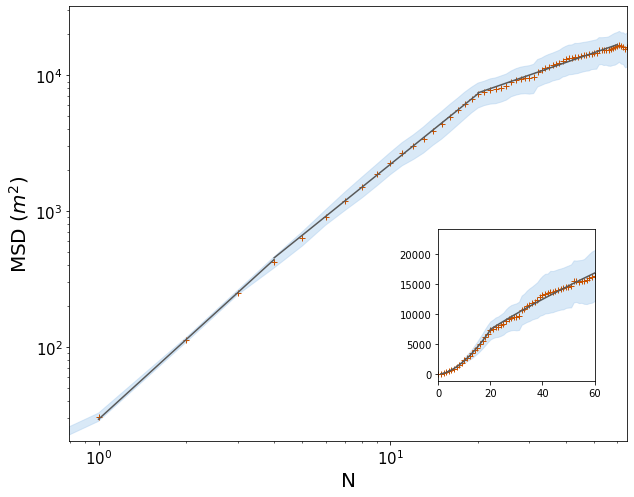

26.833333333333332 +- 3.44287598698071  18
296.6666666666667 +- 82.09020933787295  18
1234.1764705882354 +- 138.46472163328647  17
N < 4: gamma= 1.9531004718123788 +- 0.02620976351043473
4 < N < 20: gamma= 1.7281364934868422 +- 0.012687277307848419
20 < N < 60: gamma= 0.7428243818279283 +- 0.017594827559861317


In [5]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import math
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from numpy.random import shuffle
from math import sin, cos, sqrt, atan2, radians

                      
def potencia(x,a,alpha):   #f(x)=a·x^alpha to fit MSD.
    return a*x**alpha

f=open('difussion_origin_0.txt',"r")   #Open and read the file with the results of the MSD(T) obtained above.
lines=f.readlines()
data=[]
for x in lines:
    data.append(x.split('\n')[0])
f.close()


f2=open('CI_95_origin_0_plus.txt',"r")   #Open and read the file with the results of the MSD(T) obtained above.
lines2=f2.readlines()
ci_plus_origin0=[]
for x2 in lines2:
    ci_plus_origin0.append(float(x2.split('\n')[0]))
f2.close()


f3=open('CI_95_origin_0_minus.txt',"r")   #Open and read the file with the results of the MSD(T) obtained above.
lines3=f3.readlines()
ci_minus_origin0=[]
for x3 in lines3:
    ci_minus_origin0.append(float(x3.split('\n')[0]))
f3.close()



list_s=[]
for i in range(100):
    list_s.append(i)

msd=[]
for j in data:
    msd.append(float(j))
    
popt, pcov = curve_fit(potencia, list_s[1:4], msd[1:4], p0=(1,1))
times = np.arange(list_s[1], list_s[4], 0.01)
model = potencia(times, *popt)
perr = np.sqrt(np.diag(pcov))  #calcul error del parametre

popt2, pcov2 = curve_fit(potencia, list_s[4:20], msd[4:20], p0=(1,1))
times2 = np.arange(list_s[4], list_s[20], 0.01)
model2 = potencia(times2, *popt2)
perr2= np.sqrt(np.diag(pcov2))  #calcul error del parametre

popt3, pcov3 = curve_fit(potencia, list_s[20:60], msd[20:60], p0=(1,1))
times3 = np.arange(list_s[20], list_s[60], 0.01)
model3 = potencia(times3, *popt3)
perr3= np.sqrt(np.diag(pcov3))  #calcul error del parametre

#popt4, pcov4 = curve_fit(potencia, list_s[60:], msd[60:], p0=(1,1))
#times4 = np.arange(list_s[60], list_s[-1], 0.01)
#model4 = potencia(times4, *popt4)
#perr4= np.sqrt(np.diag(pcov4))  #calcul error del parametre



fig, ax1 = pp.subplots(figsize=(10,8))   
ax1.plot(list_s, msd, '+', color='#C85200',label='ordered') 
ax1.fill_between(list_s, ci_minus_origin0, ci_plus_origin0, color='#A2C8EC', alpha=.4)
ax1.set_ylabel('MSD ($m^{2}$)',fontsize=20)
ax1.set_xlabel('N',fontsize=20)
ax1.tick_params(labelsize=15)
ax1.set_yscale('log',basey=10) 
ax1.set_xscale('log',basex=10) 
ax1.set_xlim(0,65)

axins2 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.60,0.15,.35,.35), bbox_transform=ax1.transAxes)
axins2.plot(list_s, msd,'+',color='#C85200')
axins2.fill_between(list_s, ci_minus_origin0, ci_plus_origin0, color='#A2C8EC', alpha=.4)

ax1.plot(times, model, '-',color='#595959', label='ordered') 
ax1.plot(times2, model2, '-',color='#595959', label='ordered') 
ax1.plot(times3, model3, '-', color='#595959',label='ordered')
#ax1.plot(times4, model4, '-r', label='ordered')
axins2.plot(times, model, '-', color='#595959',label='ordered')
axins2.plot(times2, model2, '-',color='#595959', label='ordered')
axins2.plot(times3, model3, '-',color='#595959', label='ordered')
#axins2.plot(times4, model4, '-r', label='ordered')
axins2.set_xlim(0,60)

#plt.savefig('msd_granollers.pdf',format='pdf', bbox_inches='tight')
plt.show()


all_files = glob.glob(os.path.join("*.csv"))
t1=[]
t2=[]
t3=[]
t4=[]
for file in all_files:
    df = pd.read_csv(file)
    df2=df.copy()
    df2['time'] = pd.to_datetime(df2['time'], format='%Y-%m-%d %H:%M:%S')
    t1.append((df2['time'][4]-df2['time'][0]).total_seconds())
    t2.append((df2['time'][20]-df2['time'][4]).total_seconds())
    if len(df2['time'])>=60:
        t3.append((df2['time'][60]-df2['time'][20]).total_seconds())
        
    #if len(df2['time'])>=100:
        #t4.append((df2['time'][100]-df2['time'][60]).total_seconds())
    

mean1 = sum(t1) / len(t1)
variance1 = sum([((x1 - mean1) ** 2) for x1 in t1]) / len(t1)
res1 = variance1 ** 0.5
error1=res1/(len(t1)**0.5)

mean2 = sum(t2) / len(t2)
variance2 = sum([((x2 - mean2) ** 2) for x2 in t2]) / len(t2)
res2 = variance2 ** 0.5
error2=res2/(len(t2)**0.5)

mean3 = sum(t3) / len(t3)
variance3= sum([((x3 - mean3) ** 2) for x3 in t3]) / len(t3)
res3 = variance3 ** 0.5
error3=res3/(len(t3)**0.5)

#mean4 = sum(t4) / len(t4)
#variance4 = sum([((x4 - mean4) ** 2) for x4 in t4]) / len(t4)
#res4 = variance4 ** 0.5
#error4=res4/(len(t4)**0.5)

print(sum(t1)/len(t1), '+-', error1, '', len(t1))
print(sum(t2)/len(t2),'+-', error2, '', len(t2))
print(sum(t3)/len(t3), '+-', error3, '',len(t3))
#print(sum(t4)/len(t4), '+-', error4, '',len(t4))
                      
print('N < 4:', 'gamma=',popt[1],'+-', perr[1])
print('4 < N < 20:', 'gamma=',popt2[1],'+-', perr2[1])
print('20 < N < 60:', 'gamma=',popt3[1],'+-', perr3[1])


# 3. Autocorrelation

We obtain the autocorrelation of the logarithm of the velocities u:
\begin{align}
C(\tau)=\frac{\langle \left[ u(t)-\langle u(t)\rangle \right] \left[u(t+\tau)-\langle u(t)\rangle \right] \rangle}{\langle \left[ u(t)-\langle u(t)\rangle \right]^{2} \rangle}
\end{align}

and we fit the experimental data with an exponential distribution: $C(\tau)\sim e^{-\frac{\tau}{\alpha}}$

In [19]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import math
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from numpy.random import shuffle


all_files = glob.glob(os.path.join("*.csv")) #make list of paths


corr_mean_s=[]
interv_conf_95_plus_log=[]
interv_conf_95_minus_log=[]
for s in range(1,100):   
    corr_mean_n=[]
    print(s)
    for file in all_files: 
        df = pd.read_csv(file)      
       
        v=df['v'][:-1].tolist()
        mean_v=sum(v)/len(v)
        u=[]
        for i in range(len(v)):
            v_log=np.log(v[i]/mean_v)
            u.append(v_log)
            
           
        if len(u) > s:
            mean=sum(u)/len(u)
            variance = sum([((y - mean) ** 2) for y in u]) / len(u)
            std= variance ** 0.5  

            delta_r_i_rescaled = [(x - mean)/std for x in u]
            
            res = tuple( i*j for i, j in zip(delta_r_i_rescaled, delta_r_i_rescaled[s:])) 
            average_corr=sum(res)/len(res)    
            corr_mean_n.append(average_corr)
            
    
    corr_mean_n2=sum(corr_mean_n)/len(corr_mean_n)
    corr_mean_s.append(corr_mean_n2)
    
    mean = corr_mean_n2   #mean, variance and standard deviation for the interval confidence
    variance = sum([((xx - mean) ** 2) for xx in corr_mean_n]) / len(corr_mean_n)
    stddev = variance ** 0.5
    interv_conf_95_plus_log.append(mean+((1.960*stddev)/((len(corr_mean_n))**0.5)))   #interval confidence of 95% (z=1.960)
    interv_conf_95_minus_log.append(mean-((1.960*stddev)/((len(corr_mean_n))**0.5)))

autocorr=np.array(corr_mean_s)



np.savetxt('autocorrelation_log.txt', autocorr)
np.savetxt('autocorrelation__CI_plus_log.txt', interv_conf_95_plus_log)
np.savetxt('autocorrelation_CI_minus_log.txt', interv_conf_95_minus_log)




1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


### plot

<ipython-input-6-bbec5b434e69>:74: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-6-bbec5b434e69>:75: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)
<ipython-input-6-bbec5b434e69>:76: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  axins2.set_xlim(0,100)


88.33333333333333 +- 7.9659770350821875  18
2470.733333333333 +- 230.9827404166172  15
A*exp(-a*N)+ B*exp(-b*N) + C
a: 2.0862634855633977 +- 0.09690964822676937
A: 0.8052855281728144 +- 0.025191978696346852
C: -0.05648004061615894 +- 0.005088478845522504


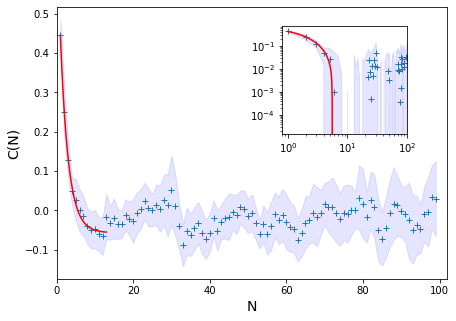

In [6]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import math
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from numpy.random import shuffle


# Double exponential
def expDouble(x,a,A,b,B,C):
    return A*np.exp(-a*x)+ B*np.exp(-b*x)+ C

def exp(x,a,A,C):
    return A*np.exp(-a*x)+C


f=open('autocorrelation_log.txt',"r")  #OPEN THE TEXT FILE WITH THE AUTOCORRELATION VALUES UP TO TAU=100
lines=f.readlines()
data=[]
for x in lines:
    data.append(x.split('\n')[0])
f.close()

list_s2=[]
for i in range(1,100):  #list of tau=1,2,...,100
    list_s2.append(i)

data2=[]
for j in data:
    data2.append(float(j))  #list of autocorrelations
    
    
tau=np.array(list_s2)        #tau and autocorrelation as array
autocorr_vel=np.array(data2)

f2=open('autocorrelation__CI_plus_log.txt',"r")   #Open and read the file with the results of the MSD(T) obtained above.
lines2=f2.readlines()
data_corr3=[]
for x2 in lines2:
    data_corr3.append(float(x2.split('\n')[0]))
f2.close()

f3=open('autocorrelation_CI_minus_log.txt',"r")   #Open and read the file with the results of the MSD(T) obtained above.
lines3=f3.readlines()
data_corr4=[]
for x3 in lines3:
    data_corr4.append(float(x3.split('\n')[0]))
f3.close()

fig, ax1 = pp.subplots(figsize=(7,5))  


#FIT
popt_corr, pcov_corr = curve_fit(exp, tau[:12], autocorr_vel[:12], p0=(1,1,0))    #Fit high values of tau>8
times_corr = np.arange(tau[0], tau[12], 0.001)
model_corr = exp(times_corr, *popt_corr)
perr_corr = np.sqrt(np.diag(pcov_corr))  #calcul error del parametre

 

ax1.plot(tau, autocorr_vel, '+', label='ordered') 
ax1.plot(times_corr, model_corr, '-r',label='fit')
ax1.fill_between(tau, data_corr4, data_corr3, color='b', alpha=.1)
ax1.set_ylabel(r'C(N)',fontsize=14)
ax1.set_xlabel(r'N',fontsize=14)
ax1.set_xlim(0,102)
axins2 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.51,1-0.45,.40,.40), bbox_transform=ax1.transAxes)
axins2.plot(tau, autocorr_vel, '+', label='data')
axins2.plot(times_corr, model_corr, '-r',label='fit')
axins2.fill_between(tau, data_corr4, data_corr3, color='b', alpha=.1)
axins2.set_yscale('log',basey=10)
axins2.set_xscale('log',basex=10)
axins2.set_xlim(0,100)

all_files = glob.glob(os.path.join("*.csv"))
t1=[]
t2=[]
for file in all_files:
    df = pd.read_csv(file)
    df2=df.copy()
    df2['time'] = pd.to_datetime(df2['time'], format='%Y-%m-%d %H:%M:%S')
    t1.append((df2['time'][12]-df2['time'][0]).total_seconds())        
    if len(df2['time'])>=100:
        t2.append((df2['time'][100]-df2['time'][12]).total_seconds())
    

mean1 = sum(t1) / len(t1)
variance1 = sum([((x1 - mean1) ** 2) for x1 in t1]) / len(t1)
res1 = variance1 ** 0.5
error1=res1/(len(t1)**0.5)

mean2 = sum(t2) / len(t2)
variance2 = sum([((x2 - mean2) ** 2) for x2 in t2]) / len(t2)
res2 = variance2 ** 0.5
error2=res2/(len(t2)**0.5)


print(sum(t1)/len(t1), '+-', error1, '', len(t1))
print(sum(t2)/len(t2),'+-', error2, '', len(t2))

print('A*exp(-a*N)+ B*exp(-b*N) + C')
print('a:', 1./popt_corr[0], '+-', perr_corr[0]/(popt_corr[0]**2))
print('A:', popt_corr[1], '+-', perr_corr[1])
print('C:', popt_corr[2], '+-', perr_corr[2])
pp.show()



# 4. Temporal series of instantaneous velocity

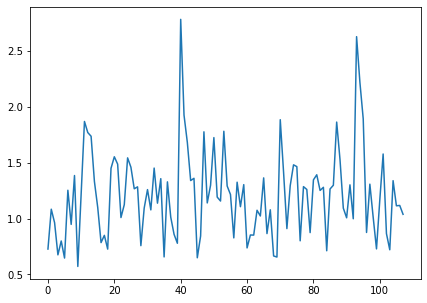

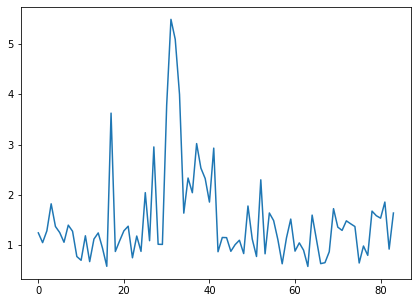

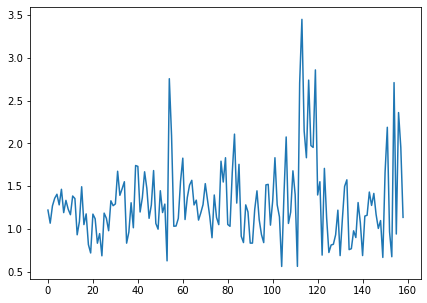

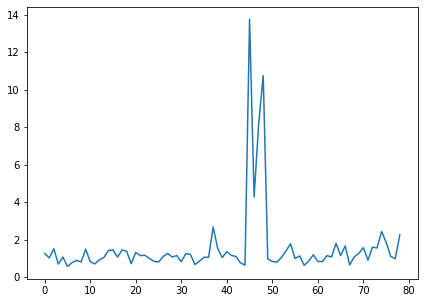

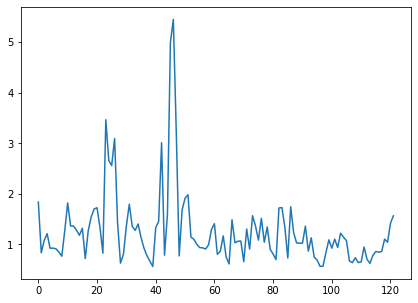

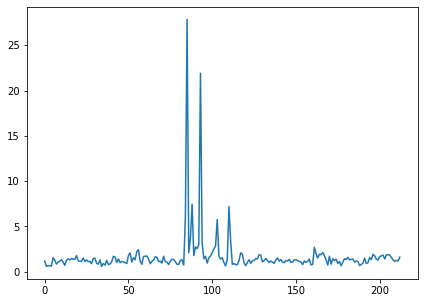

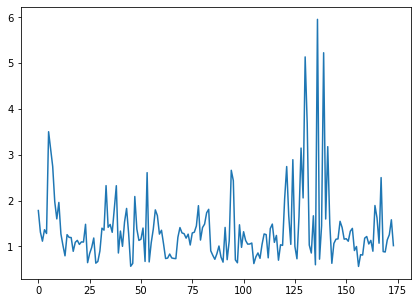

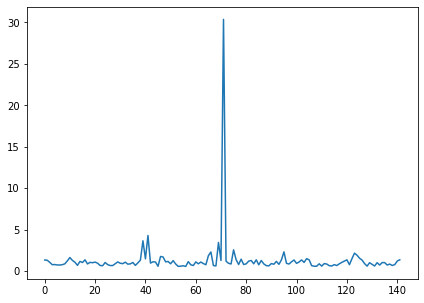

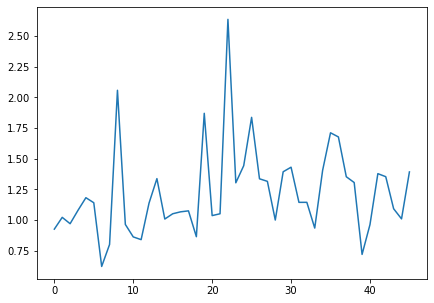

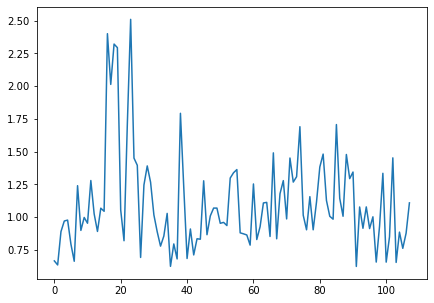

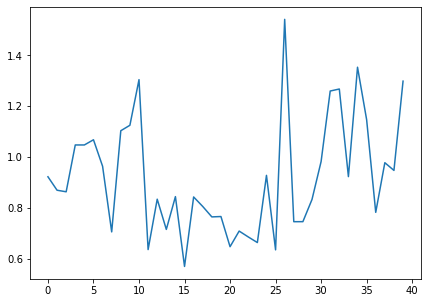

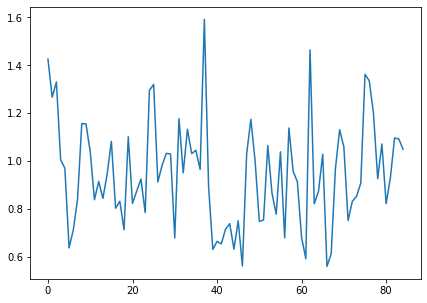

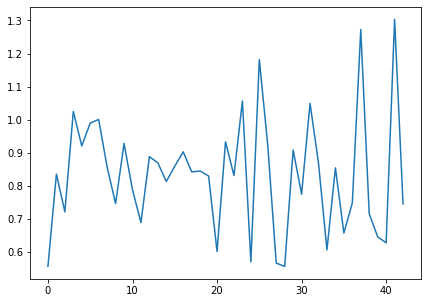

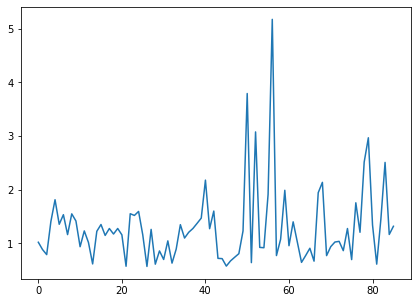

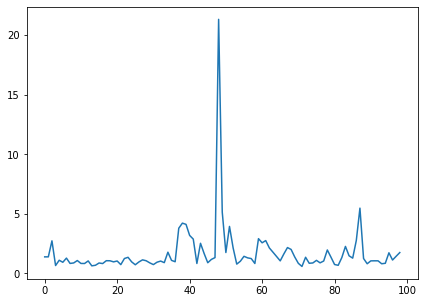

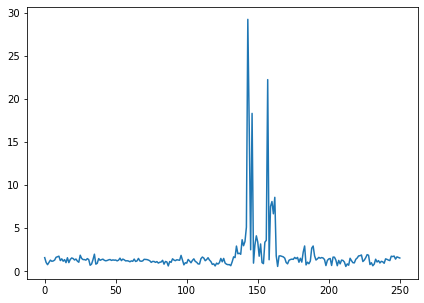

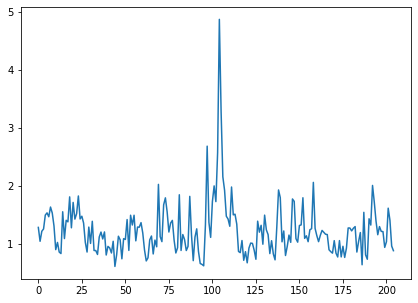

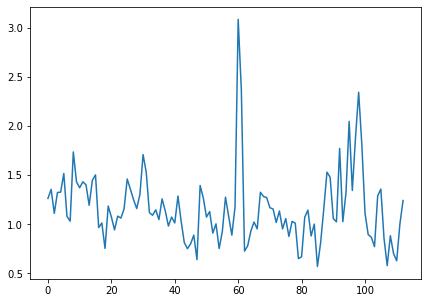

In [27]:
all_files = glob.glob(os.path.join("*.csv")) #make list of paths
for file in all_files: 
    df = pd.read_csv(file)
    df2=df.copy() 
    
    v3=df2.loc[df2['stops'] == 'flight', 'v'].tolist()
    v2=v3[:-1]
    
    t=[]
    for i in range(len(v2)):
        t.append(i)
    
    fig, ax1 = pp.subplots(figsize=(7,5)) 
    ax1.plot(t, v2, '-', label='ordered') 

# 5. PDF stops duration

nombre total stops: 107
temps total stops: 47942.0
temps promig stops: 448.05607476635515

----------------------------------------------------------------------

FIT PARAMETERS
a= 0.005143340802085056 +- 0.00026559653479565475
b= 259.57515835877274 +- 13.031775470922245


<ipython-input-7-544c2ce03ed4>:73: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-7-544c2ce03ed4>:74: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)
<ipython-input-7-544c2ce03ed4>:75: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  axins2.set_xlim(0,2000)
<ipython-input-7-544c2ce03ed4>:85: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  ax.plot(times, model, '-r',c='#595959',label='fit')
<ipython-input-7-544c2ce03ed4>:86: UserWarning: color is redundantly defined by the 'co

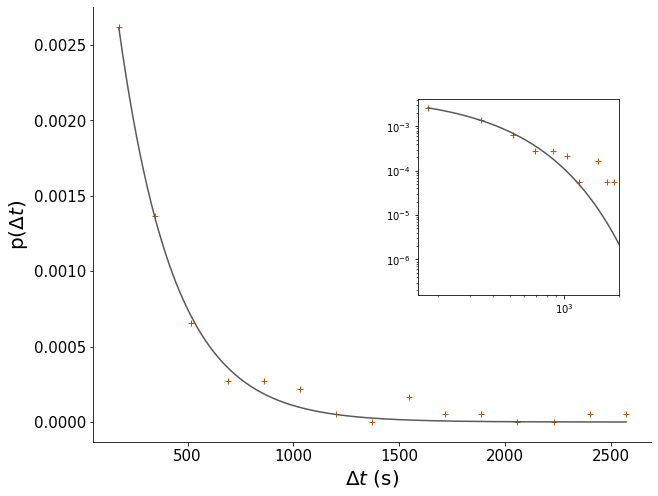

In [7]:
all_files = glob.glob(os.path.join("*.csv")) # Make list of paths (csv files for all individuals)

At_tots=[]
for file in all_files:   # Loop over all csv files in the folder/directory   
    df = pd.read_csv(file)  # Read the csv file of each user
    df2=df.copy() 
    
    del df2['stops']
    
    stops_flights=[]
    for i in range(len(df2['lat'])):
        if df2['At'][i]>=90:
            stops_flights.append('stop')
        else:
            stops_flights.append('flight')
    
    df2['stops']=stops_flights
    stops=df2['stops'].tolist()
    
    t=df2['At'].tolist()
    
    At_grup=[]
    
    i=0
    while i < len(stops):

        if stops[i]=='flight':
            i=i+1

        else:
            s=0
            stopss=[]
            while stops[i+s]=='stop':
                stopss.append(t[i+s])
                s=s+1

            At=sum(stopss)
            At_grup.append(At)
            
            i=i+s
    
    
    At_tots.extend(At_grup)

    
print('nombre total stops:',len(At_tots))
print('temps total stops:', sum(At_tots))
print('temps promig stops:', sum(At_tots)/len(At_tots))

print('')
print('----------------------------------------------------------------------')
print('')


fig, ax = plt.subplots(figsize=(10,8)) 
axins2 = inset_axes(ax, width="80%", height="100%", loc=1,bbox_to_anchor=(0.50,1-0.65,.45,.45), bbox_transform=ax.transAxes)

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)

bins=int((max(At_tots)-min(At_tots))/30.)
numpy_matrix = np.array(At_tots)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,bins='auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '+', c='#C85200', label='data')    #plot pdf
axins2.plot(bin_centres, counts, '+',c='#C85200', label='data')    #plot pdf
ax.set_xlabel(r'$\Delta t$ (s)',fontsize=20)
ax.set_ylabel(r'p($\Delta t$)',fontsize=20)
ax.tick_params(labelsize=15) 

axins2.set_yscale('log',basey=10)
axins2.set_xscale('log',basex=10)
axins2.set_xlim(0,2000)

def exp(x,a,b):
    return (a*np.exp(-x/b))

#LOG-NORMAL FIT. 
popt, pcov = curve_fit(exp, bin_centres[:], counts[:], p0=(0,200))
times = np.arange(bin_centres[0], bin_centres[-1], 0.01)
model = exp(times, *popt)
perr = np.sqrt(np.diag(pcov))  #calcul error del parametre
ax.plot(times, model, '-r',c='#595959',label='fit')
axins2.plot(times, model, '-r',c='#595959', label='fit')
#ax.set_ylim(0,0.002)

print('FIT PARAMETERS')
print('a=', popt[0], '+-', perr[0])
print('b=', popt[1], '+-', perr[1])

#plt.savefig('pdf_stops.pdf',format='pdf', bbox_inches='tight',facecolor='white',edgecolor='black')

plt.show()   





# 6. NICE PLOTS

<ipython-input-10-cc66142b4de6>:21: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins1.set_yscale('log',basey=10)
<ipython-input-10-cc66142b4de6>:22: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins1.set_xscale('log',basex=10)
<ipython-input-10-cc66142b4de6>:36: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-10-cc66142b4de6>:37: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=

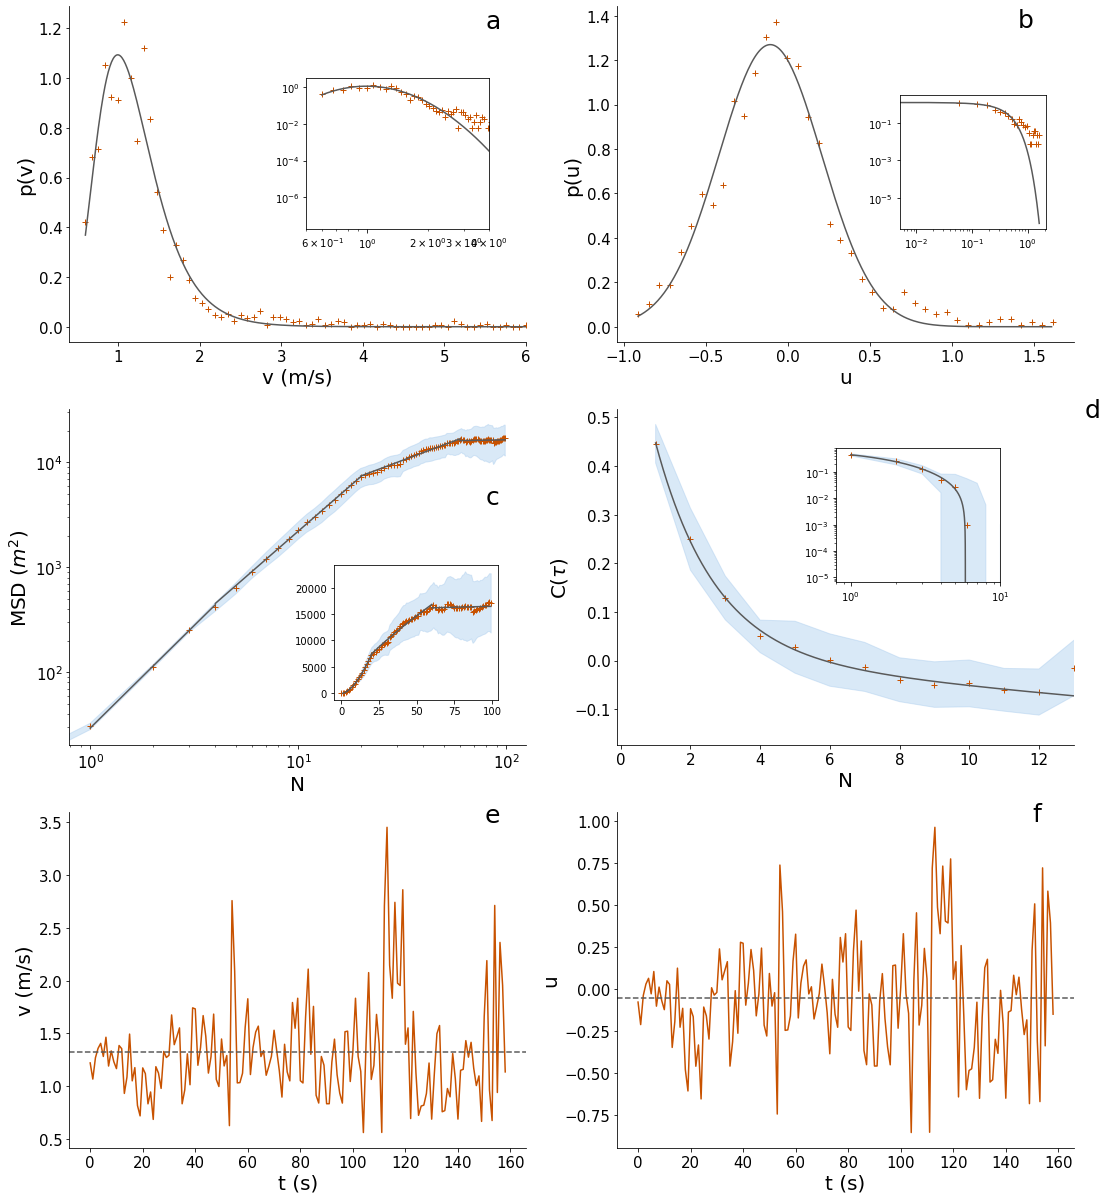

In [10]:
fig = plt.figure(figsize=(18, 21))
gs = fig.add_gridspec(nrows=3, ncols=2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])

axins1 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.43,1-0.65,.50,.45), bbox_transform=ax1.transAxes)
axins2 = inset_axes(ax2, width="80%", height="100%", loc=1,bbox_to_anchor=(0.55,1-0.65,.40,.40), bbox_transform=ax2.transAxes)
axins3 = inset_axes(ax3, width="80%", height="100%", loc=1,bbox_to_anchor=(0.50,1-0.85,.45,.40), bbox_transform=ax3.transAxes)
axins4 = inset_axes(ax4, width="80%", height="100%", loc=1,bbox_to_anchor=(0.40,1-0.50,.45,.40), bbox_transform=ax4.transAxes)

ax1.plot(bin_centres, counts, '+', c='#C85200')    #plot pdf
axins1.plot(bin_centres, counts, '+',c='#C85200')    #plot pdf
ax1.plot(times_pdf, model_pdf, '-',c='#595959')
axins1.plot(times_pdf, model_pdf, '-',c='#595959')
ax1.set_xlabel('v (m/s)',fontsize=20)
ax1.set_ylabel('p(v)',fontsize=20)
axins1.set_yscale('log',basey=10)
axins1.set_xscale('log',basex=10)
ax1.set_xlim(0.4,6)
axins1.set_xlim(0.5,4)

#axins1.set_ylim(0.0001,1)
ax1.tick_params(labelsize=15) 
ax1.text(5.5, 1.2, 'a', fontsize = 25)

ax2.plot(bin_centres_log, counts_log, '+', c='#C85200')    #plot pdf
axins2.plot(bin_centres_log, counts_log, '+',c='#C85200')    #plot pdf
ax2.plot(times_log, model_log, '-',c='#595959')
axins2.plot(times_log, model_log, '-',c='#595959')
ax2.set_xlabel('u',fontsize=20)
ax2.set_ylabel('p(u)',fontsize=20)
axins2.set_yscale('log',basey=10)
axins2.set_xscale('log',basex=10)
#axins2.set_ylim(0.001,2)
#axins2.set_xlim(0.07,1.5)
ax2.tick_params(labelsize=15) 
ax2.text(1.4, 1.35, 'b', fontsize = 25)

ax3.plot(list_s, msd, '+', c='#C85200')    #plot pdf
axins3.plot(list_s, msd, '+',c='#C85200')    #plot pdf
ax3.plot(times, model, '-',c='#595959')
ax3.plot(times2, model2, '-',c='#595959')
ax3.plot(times3, model3, '-',c='#595959')
ax3.plot(times4, model4, '-',c='#595959')
ax3.fill_between(list_s, ci_minus_origin0, ci_plus_origin0, color='#A2C8EC', alpha=.4)
axins3.plot(times, model, '-',c='#595959')
axins3.plot(times2, model2, '-',c='#595959')
axins3.plot(times3, model3, '-',c='#595959')
axins3.plot(times4, model4, '-',c='#595959')
axins3.fill_between(list_s, ci_minus_origin0, ci_plus_origin0, color='#A2C8EC', alpha=.4)
ax3.set_ylabel('MSD ($m^{2}$)',fontsize=20)
ax3.set_xlabel('N',fontsize=20)
ax3.set_yscale('log',basey=10)
ax3.set_xscale('log',basex=10)
ax3.tick_params(labelsize=15) 
#ax3.set_ylim(0,2000000)
ax3.text(80, 4000, 'c', fontsize = 25)

ax4.plot(tau, autocorr_vel, '+', c='#C85200')    #plot pdf
axins4.plot(tau, autocorr_vel, '+',c='#C85200')    #plot pdf
ax4.plot(times_corr, model_corr, '-',c='#595959')
ax4.fill_between(tau, data_corr4, data_corr3, color='#A2C8EC', alpha=.4)
axins4.plot(times_corr, model_corr, '-',c='#595959')
axins4.fill_between(tau, data_corr4, data_corr3,color='#A2C8EC', alpha=.4)
ax4.set_ylabel(r'C($\tau$)',fontsize=20)
ax4.set_xlabel('N',fontsize=20)
axins4.set_yscale('log',basey=10)
axins4.set_xscale('log',basex=10)
ax4.tick_params(labelsize=15) 
ax4.set_xlim(-0.1,13)
#ax4.set_ylim(-0.1,0.7)
axins4.set_xlim(0,10)
#axins4.set_ylim(0.001,1)
ax4.text(13.3, 0.5, 'd', fontsize = 25)

ax1.spines["top"].set_visible(False)    
ax1.spines["bottom"].set_visible(True)    
ax1.spines["right"].set_visible(False)    
ax1.spines["left"].set_visible(True)

ax2.spines["top"].set_visible(False)    
ax2.spines["bottom"].set_visible(True)    
ax2.spines["right"].set_visible(False)    
ax2.spines["left"].set_visible(True)

ax3.spines["top"].set_visible(False)    
ax3.spines["bottom"].set_visible(True)    
ax3.spines["right"].set_visible(False)    
ax3.spines["left"].set_visible(True)

ax4.spines["top"].set_visible(False)    
ax4.spines["bottom"].set_visible(True)    
ax4.spines["right"].set_visible(False)    
ax4.spines["left"].set_visible(True)

ax5.spines["top"].set_visible(False)    
ax5.spines["bottom"].set_visible(True)    
ax5.spines["right"].set_visible(False)    
ax5.spines["left"].set_visible(True)

ax6.spines["top"].set_visible(False)    
ax6.spines["bottom"].set_visible(True)    
ax6.spines["right"].set_visible(False)    
ax6.spines["left"].set_visible(True)


df1 = pd.read_csv('e3.csv')
df2=df1.copy() 

v3=df2.loc[df2['stops'] == 'flight', 'v'].tolist()
v2=v3[:-1]

t=[]
mean_vel=sum(v2)/len(v2)
u2=[]
for i in range(len(v2)):
    t.append(i)
    u2.append(np.log(v2[i]/mean_vel))

mean_u=sum(u2)/len(u2)

ax5.plot(t, v2, '-', c='#C85200')    #plot v vs At.
ax5.axhline(mean_vel, color = '#595959', linestyle = '--')
ax5.set_xlabel('t (s)',fontsize=20)
ax5.set_ylabel('v (m/s)',fontsize=20)
ax5.tick_params(labelsize=15)
ax5.text(150, 3.5, 'e', fontsize = 25)
 
ax6.plot(t, u2, '-', c='#C85200')    #plot v vs At.
ax6.axhline(mean_u, color = '#595959', linestyle = '--')
ax6.set_xlabel('t (s)',fontsize=20)
ax6.set_ylabel('u',fontsize=20)
ax6.tick_params(labelsize=15)
ax6.text(150, 1, 'f', fontsize = 25)


#plt.savefig('results_granollers.pdf',format='pdf', bbox_inches='tight')
plt.show()

nombre total stops: 133
temps total stops: 51626.0
temps promig stops: 388.16541353383457

----------------------------------------------------------------------

FIT PARAMETERS
a= 0.007753181840187208 +- 0.0007776843238934394
b= 161.8293403828181 +- 14.826583554806282


<ipython-input-110-99e42932dc74>:66: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_yscale('log',basey=10)
<ipython-input-110-99e42932dc74>:67: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins2.set_xscale('log',basex=10)


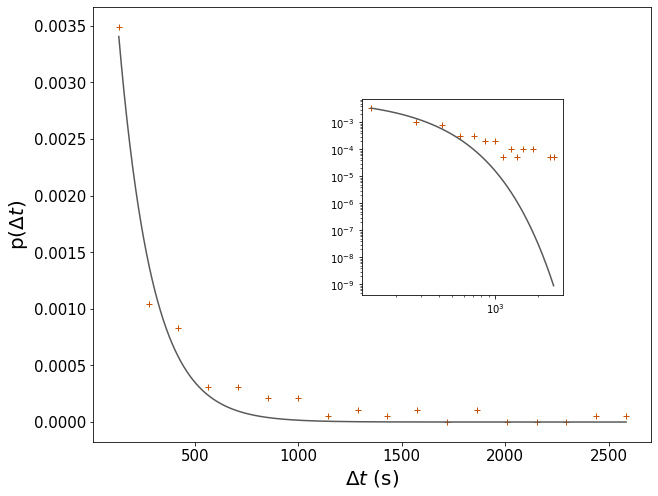

In [110]:
all_files = glob.glob(os.path.join("*.csv")) # Make list of paths (csv files for all individuals)

At_tots=[]
for file in all_files:   # Loop over all csv files in the folder/directory   
    df = pd.read_csv(file)  # Read the csv file of each user
    df2=df.copy() 
    
    del df2['stops']
    
    stops_flights=[]
    for i in range(len(df2['lat'])):
        if df2['At'][i]>=60:
            stops_flights.append('stop')
        else:
            stops_flights.append('flight')
    
    df2['stops']=stops_flights
    stops=df2['stops'].tolist()
    
    t=df2['At'].tolist()
    
    At_grup=[]
    
    i=0
    while i < len(stops):

        if stops[i]=='flight':
            i=i+1

        else:
            s=0
            stopss=[]
            while stops[i+s]=='stop':
                stopss.append(t[i+s])
                s=s+1

            At=sum(stopss)
            At_grup.append(At)
            
            i=i+s
    
    
    At_tots.extend(At_grup)

    
print('nombre total stops:',len(At_tots))
print('temps total stops:', sum(At_tots))
print('temps promig stops:', sum(At_tots)/len(At_tots))

print('')
print('----------------------------------------------------------------------')
print('')

fig, ax = plt.subplots(figsize=(10,8)) 
axins2 = inset_axes(ax, width="80%", height="100%", loc=1,bbox_to_anchor=(0.40,1-0.65,.45,.45), bbox_transform=ax.transAxes)

bins=int((max(At_tots)-min(At_tots))/30.)
numpy_matrix = np.array(At_tots)  #list to array
counts,bin_edges = np.histogram(numpy_matrix,bins='auto',density=True)   #frequences and bins
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
ax.plot(bin_centres, counts, '+', c='#C85200')    #plot pdf
axins2.plot(bin_centres, counts, '+', c='#C85200')    #plot pdf
ax.set_xlabel(r'$\Delta t$ (s)',fontsize=20)
ax.set_ylabel(r'p($\Delta t$)',fontsize=20)

axins2.set_yscale('log',basey=10)
axins2.set_xscale('log',basex=10)
ax.tick_params(labelsize=15)

def exp(x,a,b):
    return (a*np.exp(-x/b))

#LOG-NORMAL FIT. 
popt, pcov = curve_fit(exp, bin_centres[:], counts[:], p0=(0,200))
times = np.arange(bin_centres[0], bin_centres[-1], 0.01)
model = exp(times, *popt)
perr = np.sqrt(np.diag(pcov))  #calcul error del parametre
ax.plot(times, model, '-',c='#595959')
axins2.plot(times, model, '-', c='#595959')
#ax.set_ylim(0,0.002)

print('FIT PARAMETERS')
print('a=', popt[0], '+-', perr[0])
print('b=', popt[1], '+-', perr[1])


plt.show()   





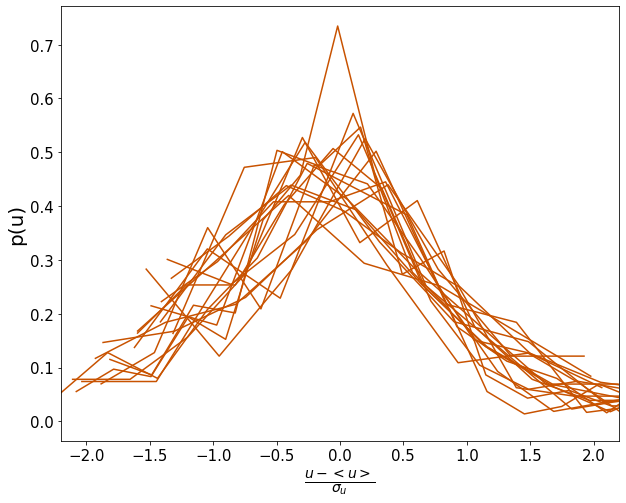

In [114]:
all_files = glob.glob(os.path.join("*.csv")) # Make list of paths (csv files for all individuals)

fig, ax = plt.subplots(figsize=(10,8)) 

for file in all_files:   # Loop over all csv files in the folder/directory   
    df = pd.read_csv(file)  # Read the csv file of each user
    df2=df.copy() 
    
    v3=df2.loc[df2['stops'] == 'flight', 'v'].tolist()
    v2=v3[:-1]
    
    v=[]
    for i in range(len(v2)):
        if v2[i]<8.0:
            v.append(v2[i])
            
    v_log=[]
    mean_v=sum(v)/len(v)
    for i in range(len(v)):
        v_log.append(np.log(v[i]/mean_v))
        
    u_rescaled=[]
    mean_u=sum(v_log)/len(v_log)
    variance_u = sum([((x_u- mean_u) ** 2) for x_u in v_log]) / len(v_log)
    res_u = variance_u ** 0.5
    for i in range(len(v_log)):
        u_rescaled.append((v_log[i]-mean_u)/res_u)
        
    
    numpy_matrix = np.array(u_rescaled)  #list to array
    counts,bin_edges = np.histogram(numpy_matrix,bins='auto',density=True)   #frequences and bins
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.   #bins center
    ax.plot(bin_centres, counts, '-', c='#C85200')    #plot pdf
    ax.set_xlabel(r'$\frac{u-<u>}{\sigma_u}$',fontsize=20)
    ax.set_ylabel('p(u)',fontsize=20)
    ax.tick_params(labelsize=15)
    ax.set_xlim(-2.2,2.2)


plt.show()




<ipython-input-73-5ac4ba344104>:19: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax3.set_yscale('log',basey=10)
<ipython-input-73-5ac4ba344104>:20: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax3.set_xscale('log',basex=10)
<ipython-input-73-5ac4ba344104>:24: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax3.set_xlim(0,65)


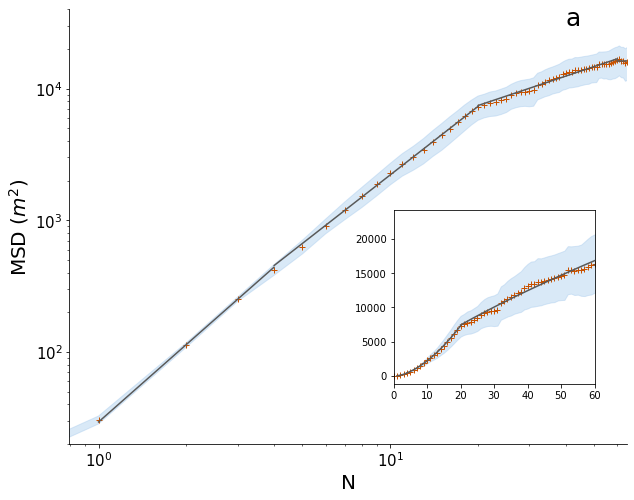

In [73]:

fig, ax3 = plt.subplots(figsize=(10,8)) 

axins3 = inset_axes(ax3, width="80%", height="100%", loc=1,bbox_to_anchor=(0.50,1-0.85,.45,.40), bbox_transform=ax3.transAxes)

ax3.plot(list_s, msd, '+', c='#C85200')    #plot pdf
axins3.plot(list_s, msd, '+',c='#C85200')    #plot pdf
ax3.plot(times, model, '-',c='#595959')
ax3.plot(times2, model2, '-',c='#595959')
ax3.plot(times3, model3, '-',c='#595959')
ax3.plot(times4, model4, '-',c='#595959')
ax3.fill_between(list_s, ci_minus_origin0, ci_plus_origin0, color='#A2C8EC', alpha=.4)
axins3.plot(times, model, '-',c='#595959')
axins3.plot(times2, model2, '-',c='#595959')
axins3.plot(times3, model3, '-',c='#595959')
axins3.plot(times4, model4, '-',c='#595959')
axins3.fill_between(list_s, ci_minus_origin0, ci_plus_origin0, color='#A2C8EC', alpha=.4)
ax3.set_ylabel('MSD ($m^{2}$)',fontsize=20)
ax3.set_xlabel('N',fontsize=20)
ax3.set_yscale('log',basey=10)
ax3.set_xscale('log',basex=10)
ax3.tick_params(labelsize=15) 
#ax3.set_ylim(0,2000000)
ax3.text(40, 30000, 'a', fontsize = 25)
ax3.set_xlim(0,65)
ax3.set_ylim(20,40000)
axins3.set_xlim(0,60)




ax3.spines["top"].set_visible(False)    
ax3.spines["bottom"].set_visible(True)    
ax3.spines["right"].set_visible(False)    
ax3.spines["left"].set_visible(True)


 

plt.savefig('msd_granollerss.pdf',format='pdf', bbox_inches='tight',facecolor='white',edgecolor='black')
#plt.savefig('msd_temporal_granollers.pdf',format='pdf')
plt.show()

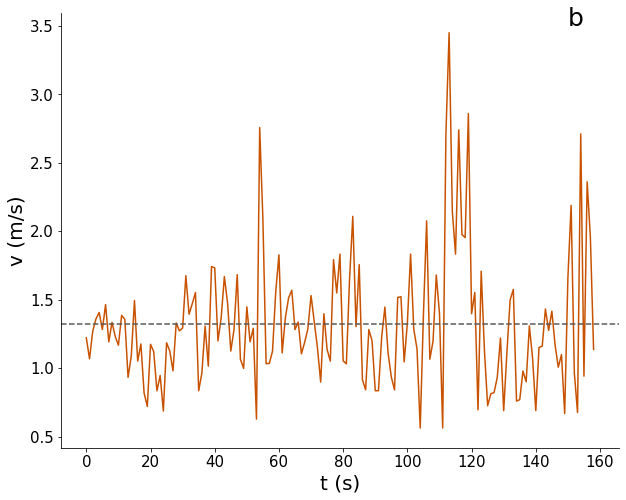

In [72]:

fig, ax5 = plt.subplots(figsize=(10,8)) 


ax5.spines["top"].set_visible(False)    
ax5.spines["bottom"].set_visible(True)    
ax5.spines["right"].set_visible(False)    
ax5.spines["left"].set_visible(True)




df1 = pd.read_csv('e3.csv')
df2=df1.copy() 

v3=df2.loc[df2['stops'] == 'flight', 'v'].tolist()
v2=v3[:-1]

t=[]
mean_vel=sum(v2)/len(v2)
u2=[]
for i in range(len(v2)):
    t.append(i)
    u2.append(np.log(v2[i]/mean_vel))

mean_u=sum(u2)/len(u2)

ax5.plot(t, v2, '-', c='#C85200')    #plot v vs At.
ax5.axhline(mean_vel, color = '#595959', linestyle = '--')
ax5.set_xlabel('t (s)',fontsize=20)
ax5.set_ylabel('v (m/s)',fontsize=20)
ax5.tick_params(labelsize=15)
ax5.text(150, 3.5, 'b', fontsize = 25)
 

plt.savefig('temporal_granollerss.pdf',format='pdf', bbox_inches='tight',facecolor='white',edgecolor='black')
#plt.savefig('msd_temporal_granollers.pdf',format='pdf')
plt.show()

<ipython-input-4-4247a0730dcf>:22: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins4.set_yscale('log',basey=10)
<ipython-input-4-4247a0730dcf>:23: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins4.set_xscale('log',basex=10)
<ipython-input-4-4247a0730dcf>:27: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  axins4.set_xlim(0,10)


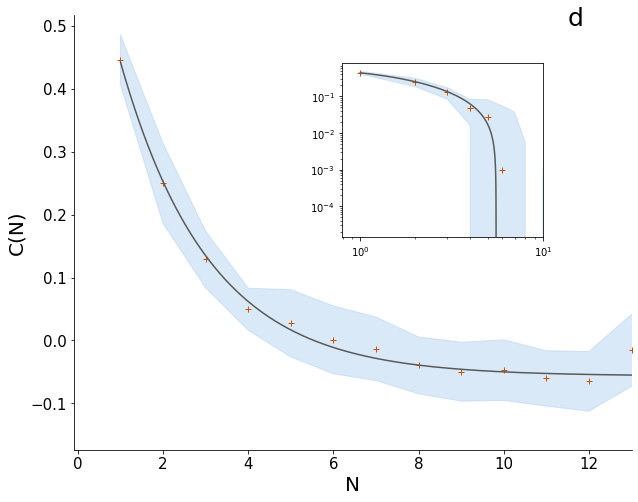

In [4]:


fig, ax4 = plt.subplots(figsize=(10,8)) 

axins4 = inset_axes(ax4, width="80%", height="100%", loc=1,bbox_to_anchor=(0.40,1-0.50,.45,.40), bbox_transform=ax4.transAxes)


ax4.spines["top"].set_visible(False)    
ax4.spines["bottom"].set_visible(True)    
ax4.spines["right"].set_visible(False)    
ax4.spines["left"].set_visible(True)




ax4.plot(tau, autocorr_vel, '+', c='#C85200')    #plot pdf
axins4.plot(tau, autocorr_vel, '+',c='#C85200')    #plot pdf
ax4.plot(times_corr, model_corr, '-',c='#595959')
ax4.fill_between(tau, data_corr4, data_corr3, color='#A2C8EC', alpha=.4)
axins4.plot(times_corr, model_corr, '-',c='#595959')
axins4.fill_between(tau, data_corr4, data_corr3,color='#A2C8EC', alpha=.4)
ax4.set_ylabel(r'C(N)',fontsize=20)
ax4.set_xlabel('N',fontsize=20)
axins4.set_yscale('log',basey=10)
axins4.set_xscale('log',basex=10)
ax4.tick_params(labelsize=15) 
ax4.set_xlim(-0.1,13)
#ax4.set_ylim(-0.1,0.7)
axins4.set_xlim(0,10)
#axins4.set_ylim(0.001,1)
ax4.text(11.5, 0.5, 'd', fontsize = 25)


plt.savefig('autocorr_granollerss.pdf',format='pdf', bbox_inches='tight',facecolor='white',edgecolor='black')
#plt.savefig('msd_temporal_granollers.pdf',format='pdf')
plt.show()

<ipython-input-70-8819a8ffe87f>:19: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins1.set_yscale('log',basey=10)
<ipython-input-70-8819a8ffe87f>:20: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axins1.set_xscale('log',basex=10)


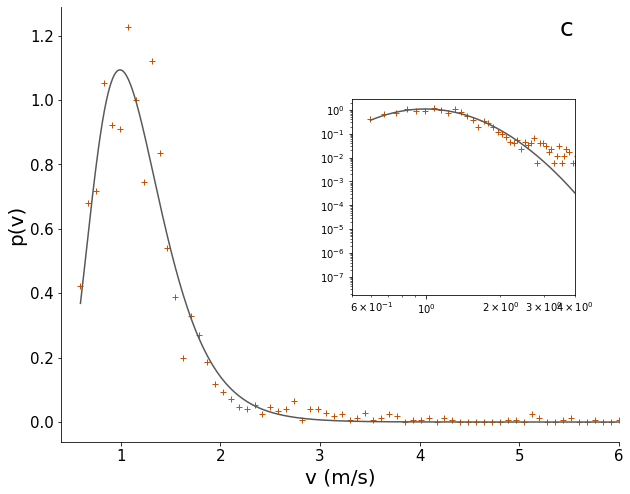

In [70]:


fig, ax1 = plt.subplots(figsize=(10,8)) 


axins1 = inset_axes(ax1, width="80%", height="100%", loc=1,bbox_to_anchor=(0.43,1-0.65,.50,.45), bbox_transform=ax1.transAxes)


ax1.spines["top"].set_visible(False)    
ax1.spines["bottom"].set_visible(True)    
ax1.spines["right"].set_visible(False)    
ax1.spines["left"].set_visible(True)


ax1.plot(bin_centres, counts, '+', c='#C85200')    #plot pdf
axins1.plot(bin_centres, counts, '+',c='#C85200')    #plot pdf
ax1.plot(times_pdf, model_pdf, '-',c='#595959')
axins1.plot(times_pdf, model_pdf, '-',c='#595959')
ax1.set_xlabel('v (m/s)',fontsize=20)
ax1.set_ylabel('p(v)',fontsize=20)
axins1.set_yscale('log',basey=10)
axins1.set_xscale('log',basex=10)
ax1.set_xlim(0.4,6)
axins1.set_xlim(0.5,4)

ax1.tick_params(labelsize=15) 
ax1.text(5.4, 1.2, 'c', fontsize = 25)
plt.savefig('pdf_granollerss.pdf',format='pdf', bbox_inches='tight',facecolor='white',edgecolor='black')
#plt.savefig('msd_temporal_granollers.pdf',format='pdf')
plt.show()